In [563]:
#Exploratory Data Analysis
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [564]:
#read the dataset
data = pd.read_excel('BA-Data-Task.xlsx')
data.head()


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
0,1917,2019,R,119,"Drama, Thriller, War",8.3,Sam Mendes,425844,159227644
1,A Star Is Born,2018,UA,136 min,"Drama, Music, Romance",7.6,Bradley Cooper,334312,215288866
2,Ah-ga-ssi,2016,A,145 min,"Drama, Romance, Thriller",8.1,Chan-wook Park,113649,2006788
3,Airlift,2016,UA,130 min,"Drama, History",8.0,Raja Menon,52897,0
4,Andhadhun,2018,UA,139 min,"Crime, Drama, Music",8.3,Sriram Raghavan,71875,1373943


In [565]:
data.tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
94,Uri: The Surgical Strike,2018,UA,138 min,"Action, Drama, War",8.211,Aditya Dhar,43444,4186168
95,Vikram Vedha,2017,UA,147 min,"Action, Crime, Drama",8.400,Gayatri,28401,NaN
96,Wind River,2017,R,107 min,NaN,7.700,Taylor Sheridan,205444,$33800859
97,Wonder,2017,U,113 min,"Drama, Family",8.000,Stephen Chbosky,141923,132422809
98,Zootopia,2016,U,108 min,"Animation, Adventure, Comedy",8.000,Byron Howard,434143,341268248


In [566]:
data.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Director          object
No_of_Votes        int64
Gross             object
dtype: object

In [567]:
data["Gross"] = [float(str(i).replace("$", "")) for i in data["Gross"]]

In [568]:
data.dtypes
data.tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
94,Uri: The Surgical Strike,2018,UA,138 min,"Action, Drama, War",8.211,Aditya Dhar,43444,4186168.0
95,Vikram Vedha,2017,UA,147 min,"Action, Crime, Drama",8.400,Gayatri,28401,NaN
96,Wind River,2017,R,107 min,NaN,7.700,Taylor Sheridan,205444,33800859.0
97,Wonder,2017,U,113 min,"Drama, Family",8.000,Stephen Chbosky,141923,132422809.0
98,Zootopia,2016,U,108 min,"Animation, Adventure, Comedy",8.000,Byron Howard,434143,341268248.0


In [569]:
data.shape

(99, 9)

In [570]:
data.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Director', 'No_of_Votes', 'Gross'],
      dtype='object')

In [571]:
data.describe()

,IMDB_Rating,No_of_Votes,Gross
count,99.000000,99.000000,7.600000e+01
mean,7.967333,231248.525253,1.179838e+08
std,0.272840,221546.272672,1.656709e+08
min,7.600000,25198.000000,0.000000e+00
25%,7.800000,54406.500000,5.475546e+06
50%,7.900000,141923.000000,4.406859e+07
75%,8.150000,376497.000000,1.743886e+08
max,8.643000,939252.000000,8.583730e+08


In [572]:
data['Released_Year'].value_counts()

2016    27
2017    22
2019    21
2018    18
2020     5
PG       1
Name: Released_Year, dtype: int64

In [573]:
#look for missing values
data.isnull().sum()

Series_Title      0
Released_Year     5
Certificate       3
Runtime           0
Genre             1
IMDB_Rating       0
Director          9
No_of_Votes       0
Gross            23
dtype: int64

In [574]:
#Duplicate Film - 'Call Me by Your Name' repeated 3 times.
data['Series_Title'].value_counts()

Call Me by Your Name                 3
1917                                 1
Marriage Story                       1
Portrait de la jeune fille en feu    1
Pink                                 1
                                    ..
Forushande                           1
Ford v Ferrari                       1
Dunkirk                              1
Druk                                 1
Zootopia                             1
Name: Series_Title, Length: 97, dtype: int64

In [575]:
# Duplicate rows
data[data.duplicated(keep=False)]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
15,Call Me by Your Name,2017,UA,132 min,"Drama, Romance",7.9,Luca Guadagnino,212651,18095701.0
20,Call Me by Your Name,2017,UA,132 min,"Drama, Romance",7.9,Luca Guadagnino,212651,18095701.0
45,Call Me by Your Name,2017,UA,132 min,"Drama, Romance",7.9,Luca Guadagnino,212651,18095701.0


In [576]:
data['Released_Year'].unique()

array([2019, 2018, 2016, 'PG', 2017, 2020, nan], dtype=object)

In [577]:
# value counts based on released year
data['Released_Year'].value_counts()

2016    27
2017    22
2019    21
2018    18
2020     5
PG       1
Name: Released_Year, dtype: int64

In [578]:
#Highest Grossing Film of year 2016
data_2016 = data.loc[data['Released_Year'] == 2016]
data_2016[data_2016['Gross']==data_2016['Gross'].max()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
75,Rogue One,2016,UA,133 min,"Action, Adventure, Sci-Fi",7.8,Gareth Edwards,556608,532177324.0


In [579]:
#Highest Grossing Film of year 2019
data_2019 = data.loc[data['Released_Year'] == 2019]
data_2019[data_2019['Gross']==data_2019['Gross'].max()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
7,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,Anthony Russo,809955,858373000.0


In [580]:
data["Certificate"].value_counts()

UA       38
U        19
A        15
R        13
PG-13     5
PG        2
TV-MA     1
16        1
TV-14     1
U/A       1
Name: Certificate, dtype: int64

In [581]:
data["Certificate"].unique()
data["Certificate"].isnull().sum()

data["Certificate"]=data["Certificate"].fillna("UA")
data["Certificate"].unique()

array(['R', 'UA', 'A', 'U', 'TV-MA', 'PG-13', 'PG', 16, 'TV-14', 'U/A'],
      dtype=object)

In [582]:
data["Released_Year"].unique()
data["Released_Year"].isnull().sum()

data["Released_Year"]=data["Released_Year"].fillna(2016)
data["Released_Year"].unique()

array([2019, 2018, 2016, 'PG', 2017, 2020], dtype=object)

In [583]:
data["Released_Year"] = [(str(i).replace("PG", '2016')) for i in data["Released_Year"]]

In [584]:
data["Genre"].unique()
data["Genre"].isnull().sum()
data["Genre"].value_counts()
data["Genre"]=data["Genre"].fillna("Drama")

In [585]:
data.isnull().sum()


Series_Title      0
Released_Year     0
Certificate       0
Runtime           0
Genre             0
IMDB_Rating       0
Director          9
No_of_Votes       0
Gross            23
dtype: int64

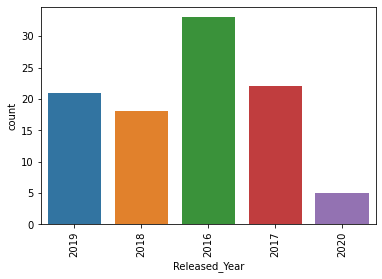

In [586]:
sns.countplot(x="Released_Year",data=data)
plt.xticks(rotation=90)
plt.show()

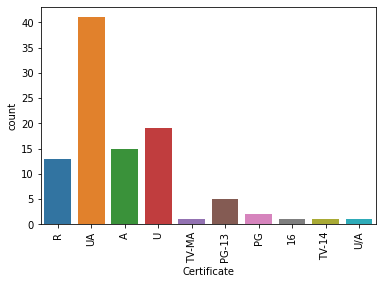

In [587]:
sns.countplot(x="Certificate",data=data)
plt.xticks(rotation=90)
plt.show()

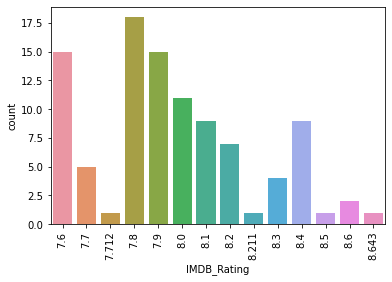

In [588]:
sns.countplot(x="IMDB_Rating",data=data)
plt.xticks(rotation=90)
plt.show()

In [589]:
#Least 10 IMDB_Rating films
data.nsmallest(n=10, columns='IMDB_Rating')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
1,A Star Is Born,2018,UA,136 min,"Drama, Music, Romance",7.6,Bradley Cooper,334312,215288866.0
5,Apollo 13,2016,U,140 min,"Adventure, Drama, History",7.6,Ron Howard,269197,173837933.0
11,Baby Driver,2017,UA,113 min,"Action, Crime, Drama",7.6,Edgar Wright,439406,107825862.0
24,Dark Waters,2019,PG-13,126 min,"Biography, Drama, History",7.6,Todd Haynes,60408,NaN
33,Gifted,2017,PG-13,101 min,Drama,7.6,Marc Webb,99643,24801212.0
37,Guardians of the Galaxy Vol. 2,2017,UA,136 min,"Action, Adventure, Comedy",7.6,NaN,569974,389813101.0
41,Hell or High Water,2016,R,102 min,"Action, Crime, Drama",7.6,David Mackenzie,204175,26862450.0
49,Just Mercy,2019,A,137 min,"Biography, Crime, Drama",7.6,Destin Daniel Cretton,46739,NaN
67,Moana,2016,U,107 min,"Animation, Adventure, Comedy",7.6,Ron Clements,272784,248757044.0
68,Nelyubov,2016,R,127 min,Drama,7.6,Andrey Zvyagintsev,29765,566356.0


In [590]:
#Top 10 IMDB_Rating films
data.nlargest(n=10, columns='IMDB_Rating')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
79,Soorarai Pottru,2020,U,153 min,Drama,8.643,Sudha Kongara,54995,NaN
34,Gisaengchung,2019,A,132 min,"Comedy, Drama, Thriller",8.600,Bong Joon Ho,552778,53367844.0
40,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.600,Thomas Kail,55291,NaN
48,Joker,2019,A,122 min,"Crime, Drama, Thriller",8.500,Todd Phillips,939252,335451311.0
7,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.400,Anthony Russo,809955,858373000.0
8,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.400,Anthony Russo,834477,678815482.0
9,Ayla: The Daughter of War,2017,UA,125 min,"Biography, Drama, History",8.400,Can Ulkay,34112,NaN
16,CapharnaÃ¼m,2018,A,126 min,Drama,8.400,Nadine Labaki,62635,1661096.0
21,Coco,2017,U,105 min,"Animation, Adventure, Family",8.400,Lee Unkrich,384171,209726015.0
23,Dangal,2016,U,161 min,"Action, Biography, Drama",8.400,Nitesh Tiwari,156479,12391761.0


In [603]:
#Count of films with respect to Certificate grouped by Released_year
df = data.groupby('Released_Year')['Certificate'].value_counts()
print(df)


Released_Year  Certificate
2016           UA             12
               U               8
               R               5
               A               4
               16              1
               PG              1
               PG-13           1
               TV-MA           1
2017           UA             13
               A               3
               U               3
               R               2
               PG-13           1
2018           UA             10
               A               3
               R               2
               U               2
               U/A             1
2019           A               5
               UA              5
               U               4
               R               3
               PG-13           2
               PG              1
               TV-14           1
2020           U               2
               PG-13           1
               R               1
               UA              1
Name: Certificat

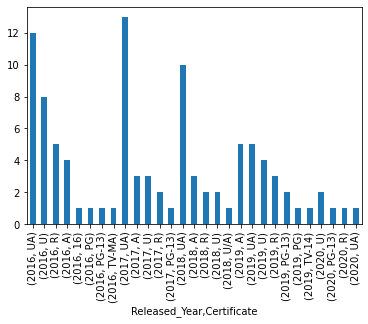

In [592]:
df=data.groupby('Released_Year').Certificate.value_counts()
ax = df.plot.bar(stacked=True) #barchart using matplotlib

In [593]:
#film with maximum no_of_votes 
data[data['No_of_Votes']==data['No_of_Votes'].max()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
48,Joker,2019,A,122 min,"Crime, Drama, Thriller",8.5,Todd Phillips,939252,335451311.0


In [594]:
##film with least no_of_votes 
data[data['No_of_Votes']==data['No_of_Votes'].min()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Gross
35,God's Own Country,2017,UA,104 min,"Drama, Romance",7.7,Francis Lee,25198,335609.0


In [595]:
# total no of films with respect to director
data['Director'].value_counts()

Anthony Russo       3
Luca Guadagnino     3
Denis Villeneuve    2
Nitesh Tiwari       2
Taika Waititi       2
                   ..
Peter Farrelly      1
Francis Lee         1
Bong Joon Ho        1
Marc Webb           1
Byron Howard        1
Name: Director, Length: 83, dtype: int64

In [596]:
data.groupby('Director').sum()

,IMDB_Rating,No_of_Votes,Gross
Director,,,
Aaron Sorkin,7.800,89896,0.0
Abhishek Chaubey,7.800,27175,0.0
Aditya Dhar,8.211,43444,4186168.0
Alfonso CuarÃ³n,7.700,140375,0.0
Amit Ravindernath Sharma,8.000,27978,0.0
...,...,...,...
Todd Phillips,8.500,939252,335451311.0
Travis Knight,7.800,118035,48023088.0
Tyler Nilson,7.600,66346,13122642.0


In [597]:
# Analysis using pivot table
data.pivot_table(index='Released_Year',columns = ['Certificate'],values = 'Gross',aggfunc = 'max',fill_value = 0)

Certificate,A,PG,PG-13,R,U,U/A,UA
Released_Year,,,,,,,
2016,151101803,48023088,3237118,363070709,341268248,0,532177324
2017,226277068,0,24801212,176040665,209726015,0,389813101
2018,3313513,0,0,324591735,190241310,26020957,678815482
2019,335451311,0,13122642,159227644,434038008,0,858373000


In [598]:
data.pivot_table(index='Released_Year',columns = ['Certificate'],values = 'Gross',aggfunc = 'min',fill_value = 0)

Certificate,A,PG,PG-13,R,U,U/A,UA
Released_Year,,,,,,,
2016,2006788,48023088,3237118,566356,1782795,0,0
2017,5904366,0,24801212,33800859,40442052,0,335609
2018,1661096,0,0,324591735,32015231,26020957,1373943
2019,53367844,0,13122642,3759854,2000000,0,349555


In [599]:
data.pivot_table(index='Released_Year',columns = ['IMDB_Rating'],values = 'Gross',aggfunc = 'count',fill_value = 0)

IMDB_Rating,7.600,7.700,7.712,7.800,7.900,8.000,8.100,8.200,8.211,8.300,8.400,8.500,8.600,8.643
Released_Year,,,,,,,,,,,,,,
2016,4,0,0,7,5,6,3,1,0,0,2,0,0,0
2017,5,3,0,3,3,2,1,2,0,0,1,0,0,0
2018,2,1,1,0,2,1,0,1,1,1,3,0,0,0
2019,2,0,0,2,4,0,2,1,0,1,1,1,1,0
2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [601]:
data.pivot_table(index='Released_Year',columns = ['IMDB_Rating'],values = 'Gross',aggfunc = 'min',fill_value = 0)

IMDB_Rating,7.600,7.700,7.712,7.800,7.900,8.000,8.100,8.200,8.211,8.300,8.400,8.500,8.600
Released_Year,,,,,,,,,,,,,
2016,566356,0,0,1782795,258168,0,1241223,9007651,0,0,5017246,0,0
2017,5904366,335609,0,6735118,18095701,92054159,226277068,20186659,0,0,209726015,0,0
2018,26020957,220159104,324591735,0,3313513,216428042,0,85080171,4186168,1373943,1661096,0,0
2019,13122642,0,0,108101214,349555,0,3759854,898575,0,159227644,858373000,335451311,53367844


In [602]:
data.pivot_table(index='Released_Year',columns = ['IMDB_Rating'],values = 'Gross',aggfunc = 'max',fill_value = 0)

IMDB_Rating,7.600,7.700,7.712,7.800,7.900,8.000,8.100,8.200,8.211,8.300,8.400,8.500,8.600
Released_Year,,,,,,,,,,,,,
2016,248757044,0,0,532177324,100546139,363070709,67209615,9007651,0,0,12391761,0,0
2017,389813101,176040665,0,188373161,18095701,132422809,226277068,54513740,0,0,209726015,0,0
2018,215288866,220159104,324591735,0,32015231,216428042,0,85080171,4186168,1373943,678815482,0,0
2019,142502728,0,0,434038008,165359751,0,117624028,898575,0,159227644,858373000,335451311,53367844
